
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.


In [2]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_titanic = pd.read_csv('C:/Users/gohch/Documents/GA/DSIF-SG-7/2_01-lab-pandas-titanic/train.csv')

df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Using groupby method to find the average ages of the group that survived and did not survive
df_titanic.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [11]:
!pip install missingno

You are using pip version 9.0.1, however version 22.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
# Exploring Missingno.

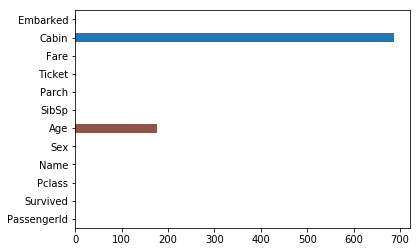

In [9]:
#Create a bar chart showing how many missing values are in each column

no_of_na = df_titanic.isna().sum()

no_of_na.plot(kind='barh')

In [10]:
no_of_na

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ans: Cabin has the most NA values, with 687 NA values in total

In [11]:
# Delete all rows where Embarked is empty

df_titanic.dropna(subset=['Embarked'], axis = 0, inplace = True)

In [12]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [13]:
# Fill all empty cabins with ¯\(ツ)/¯

df_titanic['Cabin'].fillna('¯\(ツ)/¯', inplace = True)

In [14]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          889 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [15]:
df_titanic['FamilyCount'] = df_titanic['SibSp'] + df_titanic['Parch']

In [16]:
def isreverend(name):
    namelist = name.split(' ')
    if 'Rev.' in namelist:
        return 1
    else:
        return 0

In [17]:
df_titanic['IsReverend'] = df_titanic['Name'].apply(isreverend)

In [18]:
# To check
df_titanic[df_titanic['IsReverend']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\(ツ)/¯,S,0,1
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,0,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\(ツ)/¯,S,1,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\(ツ)/¯,Q,0,1
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\(ツ)/¯,S,1,1


In [19]:
dummyembarked = pd.get_dummies(df_titanic['Embarked'])
dummyembarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [20]:
df_titanic = df_titanic.join(dummyembarked)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1


In [21]:
df_titanic = df_titanic.rename(columns={'C':'Embarked_C', 'Q':'Embarked_Q', 'S':'Embarked_S'})
#df_titanic = df_titanic.drop('Embarked', axis = 1)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1


In [22]:
dummysex = pd.get_dummies(df_titanic['Sex'])
df_titanic = df_titanic.join(dummysex)
#df_titanic = df_titanic.drop('Sex', axis = 1)


In [23]:
#BONUS: Extract the title from everyone's name and create dummy columns

def extract_title(name):
    namelist = name.split(' ')
    for x in namelist:
        if x[-1] == '.': 
            return x

In [24]:
df_titanic['Title'] = df_titanic['Name'].apply(extract_title)


In [25]:
dummytitles = pd.get_dummies(df_titanic['Title'])
df_titanic = df_titanic.join(dummytitles)
#df_titanic = df_titanic.drop('Title', axis = 1)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,1,0,0,0,0


## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [26]:
# 1. What was the survival rate overall?
df_titanic['Survived'].mean()


0.38245219347581555

Ans: Overall survival rate was 38.2%.

In [27]:
# 2. Which gender fared the worst? What was their survival rate?
df_titanic.groupby('male')['Survived'].mean() #This gives a percentage of survival (rate of survival)

male
0    0.740385
1    0.188908
Name: Survived, dtype: float64

In [28]:
df_titanic.groupby('male')['Survived'].sum() #Numerator

male
0    231
1    109
Name: Survived, dtype: int64

In [29]:
df_titanic.groupby('male')['Survived'].count() #Denominator (Total number of males and females)

male
0    312
1    577
Name: Survived, dtype: int64

Ans: Females' survival rate was much higher than males' survival rate

In [77]:
#3. What was the survival rate for each Pclass?
df_titanic.groupby('Pclass')['Survived'].mean() 

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Ans: Passengers in Pclass 1 had the highest rate of survival at 62.6%, while Pclass 3 had lowest rate of survival at 24.2%.

In [31]:
#4. Did any reverends survive? How many?

df_titanic.groupby('IsReverend')['Survived'].mean() 

IsReverend
0    0.385051
1    0.000000
Name: Survived, dtype: float64

Ans: None of the Reverends survived.

In [32]:
# 5. What is the survival rate for cabins marked ¯\(ツ)/¯
df_titanic.groupby('Cabin')['Survived'].mean()['¯\(ツ)/¯']

0.29985443959243085

The survival rate was 30.0%.

In [33]:
# 6. What is the survival rate for people whose Age is empty?
df_titanic_no_age = df_titanic[df_titanic['Age'].isna()]
df_titanic_no_age.head()
df_titanic_no_age['Survived'].mean()

#Qn: Is groupby possible for this one?

0.2937853107344633

Ans: 29.4% survival rate for people whose Age is empty

In [37]:
# 7. What is the survival rate for each port of embarkation?
df_titanic.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Ans: The survival rate is 55% for C, 39% for Q, 34% for S.

In [42]:
# 8. What is the survival rate for children (under 12) in each Pclass?
df_titanic_under12 = df_titanic[df_titanic['Age'] < 12]

In [43]:
df_titanic_under12.groupby('Embarked')['Survived'].mean()

Embarked
C    0.800000
Q    0.000000
S    0.574074
Name: Survived, dtype: float64

Ans: 80% survival for C, no survivors for Q, and 57% survival rate for S (among children under 12 years).


In [44]:
# 9. Did the captain of the ship survive? Is he on the list?
df_titanic[df_titanic['Title'] == 'Capt.']['Survived']

745    0
Name: Survived, dtype: int64

Ans: Sadly, the captain did not survive, he was on the ship.

In [45]:
# 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

df_titanic['Fare'].max()

512.3292

Ans: Most expensive ticked was $512.

In [46]:
#Show the person with the most expensive ticket using sort
df_titanic.sort_values('Fare', ascending=False).iloc[0]

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                          35
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                    512.329
Cabin                   ¯\(ツ)/¯
Embarked                      C
FamilyCount                   0
IsReverend                    0
Embarked_C                    1
Embarked_Q                    0
Embarked_S                    0
female                        1
male                          0
Title                     Miss.
Capt.                         0
Col.                          0
Countess.                     0
Don.                          0
Dr.                           0
Jonkheer.                     0
Lady.                         0
Major.                        0
Master.                       0
Miss.                         1
Mlle.                         0
Mme.    

In [49]:
# 11. Does having family on the boat help or hurt your chances of survival?
df_titanic.groupby('FamilyCount')['Survived'].mean()

FamilyCount
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

In [50]:
df_titanic.groupby('FamilyCount')['PassengerId'].count()

FamilyCount
0     535
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: PassengerId, dtype: int64

Ans: by looking at the numbers, the chances of survival does increase when there are 0 to 3 family members on board. 


Only a small number of passengers (<25 for each family count) has 4 or more family members on board, hence an accurate comparison cannot be done.

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


In [67]:
#To recap columns in the dataset
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 37 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          889 non-null object
Embarked       889 non-null object
FamilyCount    889 non-null int64
IsReverend     889 non-null int64
Embarked_C     889 non-null uint8
Embarked_Q     889 non-null uint8
Embarked_S     889 non-null uint8
female         889 non-null uint8
male           889 non-null uint8
Title          889 non-null object
Capt.          889 non-null uint8
Col.           889 non-null uint8
Countess.      889 non-null uint8
Don.           889 non-null uint8
Dr.            889 non-null uint8
Jonkheer.      889 non-null uint8
L

In [ ]:
# scatter plots cannot really be used in this instance because the outcome (survival) is categorical, 1 or 0, or can also be expressed in terms of survival rate
# Charts showing survival rates of ports of embarkation vs age group - Heat map

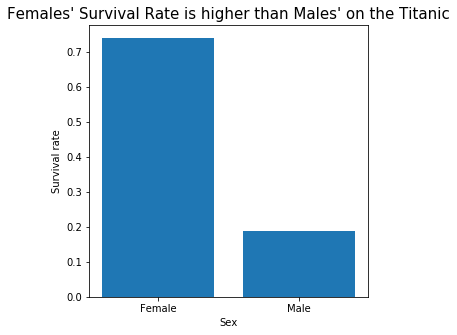

In [68]:
# BAR CHART
plt.figure(figsize=(5, 5))

# plt.bar() will create a vertical bar chart.
plt.bar(['Male', 'Female'], 
        [df_titanic[df_titanic['Sex']=='male']['Survived'].mean(), 
         df_titanic[df_titanic['Sex']=='female']['Survived'].mean()]) 

# Add a title and show the plot.
plt.title("Females' Survival Rate is higher than Males' on the Titanic", {'fontsize': 15});
plt.xlabel('Sex') # add x axis label
plt.ylabel('Survival rate'); # add y axis label

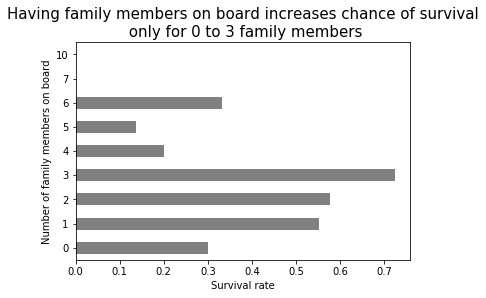

In [65]:
df_titanic.groupby('FamilyCount')['Survived'].mean().plot(kind='barh',color = ['grey'])

plt.title('Having family members on board increases chance of survival\n only for 0 to 3 family members', {'fontsize': 15});
plt.xlabel('Survival rate') # add x axis label
plt.ylabel('Number of family members on board'); # add y axis label

In [ ]:
# Plot the same as a line graph instead
# Establish the size of the figure.
plt.figure(figsize = (16, 9))

# Create line plot of GOOG volume over time.
plt.plot(stocks[stocks['ticker'] == 'GOOG']['date'],
         stocks[stocks['ticker'] == 'GOOG']['volume'],
         label = 'GOOG')

plt.legend(loc = 'upper right', fontsize = 'large');

In [72]:
df_titanic_ages = df_titanic.dropna(subset=['Age'], axis = 0)
df_titanic_ages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 37 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          712 non-null object
Embarked       712 non-null object
FamilyCount    712 non-null int64
IsReverend     712 non-null int64
Embarked_C     712 non-null uint8
Embarked_Q     712 non-null uint8
Embarked_S     712 non-null uint8
female         712 non-null uint8
male           712 non-null uint8
Title          712 non-null object
Capt.          712 non-null uint8
Col.           712 non-null uint8
Countess.      712 non-null uint8
Don.           712 non-null uint8
Dr.            712 non-null uint8
Jonkheer.      712 non-null uint8
L

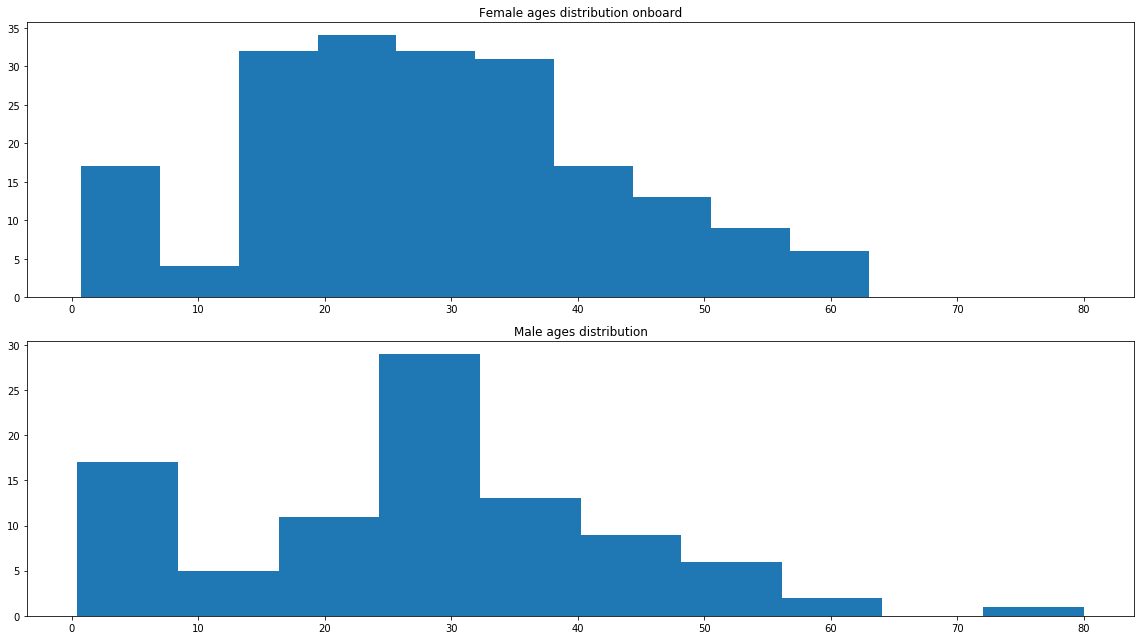

In [80]:
# Trying my hand at plotting Histogram (Even though this is just survival no.'s and not survival rate)
# Establish figure size.
plt.figure(figsize = (16,9))

# subplots- allows us to have multiple plot in the same plot.
# plt.subplot(2, 1, 1) referencing plot 1.
ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Female ages distribution onboard')
ax1.hist(df_titanic_ages[(df_titanic_ages['Sex'] == 'female') & (df_titanic_ages['Survived'] == 1) ]['Age']);

# plt.subplot(2, 1, 2)  referencing plot 2.
ax2 = plt.subplot(2, 1, 2, sharex = ax1)
ax2.set_title('Male ages distribution')
ax2.hist(df_titanic_ages[(df_titanic_ages['Sex'] == 'male') & (df_titanic_ages['Survived'] == 1) ]['Age'])

plt.tight_layout() # adds more space

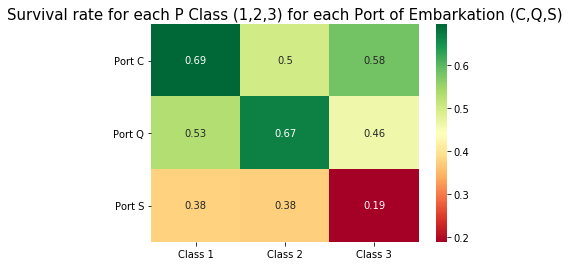

In [86]:
# Heat map. can reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html
# Plot survival rate for each P class (1,2,3) for each port of embarkation (C,Q,S): Total 3*3=9 squares

arr=np.array([[df_titanic[(df_titanic['Pclass']==1) & (df_titanic['Embarked_C']== 1)]['Survived'].mean(),
              df_titanic[(df_titanic['Pclass']==1) & (df_titanic['Embarked_Q']== 1)]['Survived'].mean(),
               df_titanic[(df_titanic['Pclass']==1) & (df_titanic['Embarked_S']== 1)]['Survived'].mean()],
              
              [df_titanic[(df_titanic['Pclass']==2) & (df_titanic['Embarked_C']== 1)]['Survived'].mean(),
              df_titanic[(df_titanic['Pclass']==2) & (df_titanic['Embarked_Q']== 1)]['Survived'].mean(),
               df_titanic[(df_titanic['Pclass']==2) & (df_titanic['Embarked_S']== 1)]['Survived'].mean()],
              
              [df_titanic[(df_titanic['Pclass']==3) & (df_titanic['Embarked_C']== 1)]['Survived'].mean(),
              df_titanic[(df_titanic['Pclass']==3) & (df_titanic['Embarked_Q']== 1)]['Survived'].mean(),
               df_titanic[(df_titanic['Pclass']==3) & (df_titanic['Embarked_S']== 1)]['Survived'].mean()]
             ])

x_axis_labels=["Class 1", "Class 2", "Class 3"]
y_axis_labels=["Port C", "Port Q", "Port S"]

testing = sns.heatmap(arr, xticklabels = x_axis_labels, yticklabels = y_axis_labels, cmap="RdYlGn",annot=True)
plt.yticks(rotation=0)
testing = plt.title("Survival rate for each P Class (1,2,3) for each Port of Embarkation (C,Q,S)", fontdict={"fontsize":15})

Conclusion: Unsurprisingly, the Class 3 passengers generally had lower chance of survival compared to class 1 passengers. The Class 3 passengers who embarked at Port S had the lowest chance of survival.